# Analysis of the Android App Market on Google Play

---
![alt Google Play Logo](images/google_play_store.webp)

---

## Table of Contents
<ol>
  <li>Overview</li>
  <li>Dataset</li>
  <li>Data Cleaning</li>
  <li>Correcting Data Types</li>
  <li>Exploring App Categories</li>
  <li>Distribution of App Ratings</li>
  <li>Relation Between Size and Price of an App</li>
  <li>Relation Between App Category and App Price</li>
  <li>Filtering out "junk" Apps</li> 
  <li>Popularity of Paid Apps vs Free Apps</li>
  <li>Sentiment Analysis of Users Reviews</li>
  <li>Conclusions</li>
  <li>Growth and Next Steps</li>
  <li>Acknowledgement</li>
</ol>

---


## 1. Overview 
Mobile apps are an integral part of modern life, offering a wide range of functionalities from entertainment to productivity. With the ease of app development and the potential for significant financial returns, the mobile app market continues to expand rapidly. As a result, more apps are being developed every day, contributing to a highly competitive and dynamic ecosystem.

In this notebook, we will perform a comprehensive analysis of the Android app market by examining data from over ten thousand apps available on the Google Play Store. By exploring key metrics across various app categories, we aim to uncover valuable insights that can inform strategies for app growth and user retention.

Our analysis will address the following key questions:
- What are the most popular app categories?
- How do user ratings vary across mobile apps?
- How does price and size of apps affect ratings?
- What pricing models (free vs. paid) are most prevalent, and how do they impact app success?
- Can the category of an app be used to justify the price?
- Are users more satisfied with free apps?

Through data visualisation and exploration, this notebook seeks to provide actionable insights for app developers, marketers, and stakeholders in the Android app ecosystem.

---



## 2. Dataset 
For this analysis, we will use data from two files that provide comprehensive information about Android apps and user reviews on the Google Play Store:

### 1. `apps.csv`
This file contains detailed information about various applications available on Google Play. It includes **13 features** that describe each app, such as:

- **App**: The name of the application.
- **Category**: The category to which the app belongs (e.g., Games, Productivity).
- **Rating**: Average user rating (out of 5).
- **Reviews**: Number of user reviews.
- **Size**: Size of the app file.
- **Installs**: Total number of installations.
- **Type**: Type of the app (free or paid).
- **Price**: Cost of the app.
- **Content Rating**: Age group for which the app is suitable.
- **Genres**: App genres.
- **Last Updated**: Date of the last update.
- **Current Version**: The app's current version.
- **Android Version**: Minimum Android version required to run the app.

### 2. `user_reviews.csv`
This file contains up to **100 user reviews per app**, focusing on the most helpful reviews. In addition to the review text, the data includes three key features:

- **Sentiment**: Indicates whether the review is Positive, Negative, or Neutral.
- **Sentiment Polarity**: A numerical value ranging from -1 (most negative) to +1 (most positive), representing the emotional tone of the review.
- **Sentiment Subjectivity**: A score between 0 and 1 indicating how subjective or opinion-based the review is (higher values suggest greater subjectivity).

These datasets together provide a rich source of information for understanding app performance, user satisfaction, and market trends. We will use them to explore patterns, draw insights, and develop strategies for improving app growth and user engagement.



In [11]:
# Read in apps dataset
import pandas as pd
apps_with_duplicates = pd.read_csv("datasets/apps.csv")

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', apps.shape)

# Have a look at a random sample of 5 rows
print(apps.head())

Total number of apps in the dataset =  (9659, 14)
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018

In [12]:
# Read in user reviews dataset
import pandas as pd
reviews_with_duplicates = pd.read_csv("datasets/user_reviews.csv")

# Drop duplicates from reviews_with_duplicates
reviews = reviews_with_duplicates.drop_duplicates()

# Print the total number of reviews
print('Total number of reviews in the dataset = ', reviews.shape)

# Have a look at a random sample of 5 rows
print(reviews.head())

Total number of reviews in the dataset =  (30679, 5)
                     App                                             Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


---

## 3. Data Cleaning

Data cleaning is a crucial step in any data science project, ensuring that the dataset is accurate, consistent, and ready for analysis. Although it can be a time-consuming process, its importance cannot be overstated, as clean data leads to more reliable insights and accurate results.

### Issues Identified in the Dataset
Upon examining a random sample of the dataset, we noticed some inconsistencies in the formatting of key columns, specifically:

- **Installs**: Contains special characters like commas (`,`) and plus signs (`+`), which prevent this column from being purely numeric.
- **Price**: Contains dollar signs (`$`), making it impossible to perform mathematical operations without further processing.

To prepare the data for analysis, we need to clean these columns by removing the unwanted characters and converting the values to numeric types.

### Data Cleaning Steps
1. **Remove Special Characters**:
   - Strip commas (`,`), plus signs (`+`), and dollar signs (`$`) from the `Installs` and `Price` columns.
2. **Convert to Numeric**:
   - Convert the cleaned values in both columns to appropriate numeric data types (e.g., integers or floats).

### Printing the Data Summary
After cleaning, it is good practice to print a summary of the cleaned dataset to ensure all transformations were applied correctly. We will use the `info()` method to check the data types and verify that the `Installs` and `Price` columns are now numeric.

By addressing these issues, we ensure that the dataset is properly formatted and ready for accurate analysis in subsequent steps.


In [13]:
# List of characters to remove
chars_to_remove = ['+', ',', '$']
# List of column names to clean
cols_to_clean = ["Installs", "Price"]

# Loop for each column in cols_to_clean
for col in cols_to_clean:
    # Loop for each char in chars_to_remove
    for char in chars_to_remove:
        # Replace the character with an empty string
        apps[col] = apps[col].apply(lambda x: x.replace(char, ""))
        
# Print a summary of the apps dataframe
print(apps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


---

## 4. Correcting Data Types

During the data cleaning process, we observed that the **Installs** and **Price** columns were categorized as `object` data types instead of the desired `int` or `float` types. This occurred because these columns originally contained a mix of numeric values and special characters (e.g., commas, plus signs, dollar signs), preventing them from being interpreted as purely numerical data.

### Why Correcting Data Types Matters
Accurate data types are essential for performing mathematical operations, statistical analysis, and visualisations. By ensuring that **Installs** and **Price** are numeric, we can efficiently analyze trends, correlations, and distributions in the dataset.

### Columns to Focus On
The four key features we will be analyzing most frequently are:

- **Installs**: Needs conversion to `int` after removing special characters.
- **Price**: Needs conversion to `float` after removing the dollar sign (`$`).
- **Size**: Already a `float` type, no changes needed.
- **Rating**: Already a `float` type, no changes needed.

### Data Type Corrections
To correct the data types:
1. **Installs**: Convert the cleaned `Installs` column to `int`.
2. **Price**: Convert the cleaned `Price` column to `float`.

### Pandas Data Types Overview
In Pandas, common data types include:
- `int64`: Integer values.
- `float64`: Decimal values.
- `object`: Mixed or string data.

For more information on Pandas data types, refer to the Pandas documentation.

By ensuring **Installs** and **Price** are numeric, we set the foundation for accurate and effective analysis in the upcoming sections.


In [14]:
import numpy as np

# Convert Installs to integer data type
apps["Installs"] = apps["Installs"].astype("int64")

# Convert Price to float data type
apps["Price"] = apps["Price"].astype("float")

# Checking dtypes of the apps dataframe
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


---

## 5. Exploring App Categories

With over 1 billion active users in 190 countries, Google Play is a key platform for distributing mobile apps to a global audience. To enhance discoverability, Google groups apps into various **categories**, allowing users to easily find apps that meet their needs. Understanding these categories can provide valuable insights into market trends and opportunities for app developers.

### Key Questions
Our exploration focuses on answering the following questions:
1. **Which category has the highest share of active apps in the market?**
2. **Is any specific category dominating the market?**
3. **Which categories have the fewest number of apps?**



Number of categories =  33


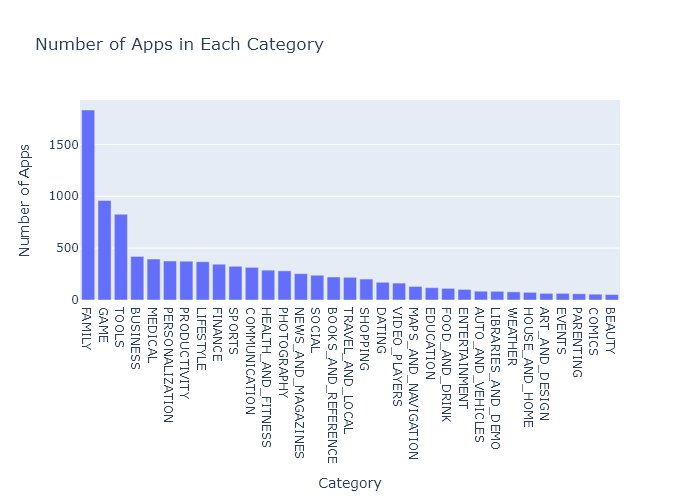

In [15]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps["Category"].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps["Category"].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

data = [go.Bar(
        x = sorted_num_apps_in_category.index, # index = category name
        y = sorted_num_apps_in_category.values, # value = count
)]

layout = {
    'title': 'Number of Apps in Each Category',  # Chart title
    'xaxis': {'title': 'Category'},  # X-axis label
    'yaxis': {'title': 'Number of Apps'}  # Y-axis label
}
fig = go.Figure({'data': data, 'layout': layout})
fig.write_image("images/category_bar_chart.png")  # Save as PNG
fig.show("png")
#plotly.offline.iplot({'data': data, 'layout': layout})



### Overview of Categories
The dataset reveals **33 unique app categories**, ranging from entertainment and productivity to specialized fields like medical and educational apps. This classification plays a crucial role in app visibility and user engagement.

### Insights from the Dataset
- **Family** and **Game** apps dominate the market, making up the largest share of active apps. This reflects the high demand for entertainment and educational content for children and families.
- **Tools**, **Business**, and **Medical** apps also rank high, highlighting the growing need for productivity solutions, professional applications, and healthcare-related services.
- On the other hand, categories like **Comics**, **Beauty**, and **Parenting** have fewer apps, indicating potential niches with less competition.

By analysing the distribution of apps across categories, we better understand the dynamics of the Android app market and identify areas where developers might find growth opportunities or face stiff competition.

---

## 6. Distribution of App Ratings

App ratings, ranging from **1 to 5**, are a critical performance indicator in the Android app market. They influence an app's visibility on the Google Play Store, affect user conversion rates, and contribute to a company's overall brand perception. Higher ratings not only improve the likelihood of being featured but also foster trust and engagement among users.



Average app rating =  4.173243045387994


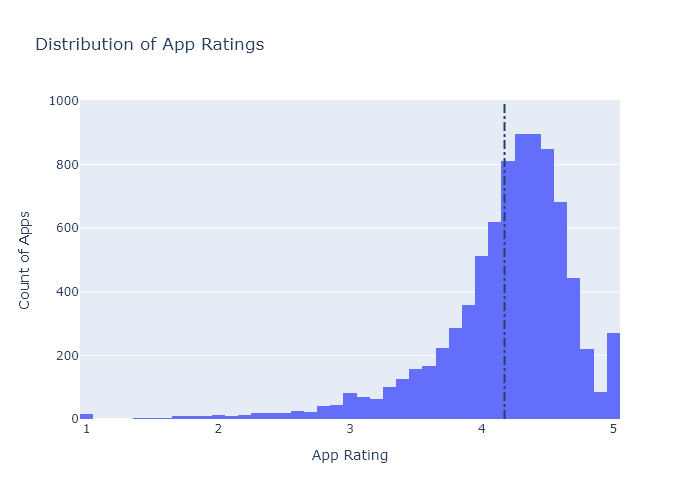

In [16]:
# Average rating of apps
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Title, x label, y label and vertical dashed line to indicate the average app rating
layout = {
    'title': 'Distribution of App Ratings',  # Title of the histogram
    'xaxis': {'title': 'App Rating'},  # X-axis label
    'yaxis': {'title': 'Count of Apps'},  # Y-axis label
    'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

fig = go.Figure({'data': data, 'layout': layout})
fig.write_html("images/app_rating_hist.html")  # Save as html
fig.show("png")

#plotly.offline.plot({'data': data, 'layout': layout}, filename='images/app_rating_hist.html', auto_open=False)
#plotly.offline.iplot({'data': data, 'layout': layout})



### Key Insight: Average Rating
From our analysis, the **average app rating** across all categories is **4.17**, indicating that most apps receive favourable feedback from users.

### Histogram Analysis
A histogram plot of app ratings reveals that the distribution is **left-skewed**:
- The majority of apps are rated highly, with ratings clustered around 4.0 and above.
- Only a small portion of apps receive low ratings (below 3.0), which suggests that poorly rated apps are the exception rather than the norm.

### Implications
The skewed distribution indicates that users generally have positive experiences with most apps, which could be due to the competitive nature of the market encouraging developers to maintain high-quality standards. However, the few low-rated apps highlight the importance of addressing user feedback and maintaining app performance to avoid poor ratings.

Understanding the distribution of ratings helps developers benchmark their app's performance against industry standards and underscores the importance of maintaining high user satisfaction to succeed in the crowded app marketplace.

---


## 7. Price and Size of an App

App size and price are crucial factors influencing user adoption and satisfaction. Both aspects can significantly impact the success of an app, especially in regions with limited internet speeds, lower earning power, and strict device storage constraints.

### Importance of App Size
If an app is too large:
- **Download Challenges**: Users may experience lengthy download times, which can discourage them from installing the app.
- **Storage Limitations**: Users may avoid large apps due to limited disk space on their devices.

### Importance of App Price
App pricing also plays a vital role:
- **User Expectations**: Many users expect apps to be free or relatively inexpensive.
- **Global Considerations**: In developing markets, factors like internet speeds, income levels, and exchange rates make affordability even more critical.

### Key Questions to Explore
1. **Does the size of an app affect its rating?**
2. **Do users prefer lightweight apps over system-heavy ones?**
3. **Does the price of an app influence its rating?**
4. **Do users prefer free apps over paid ones?**


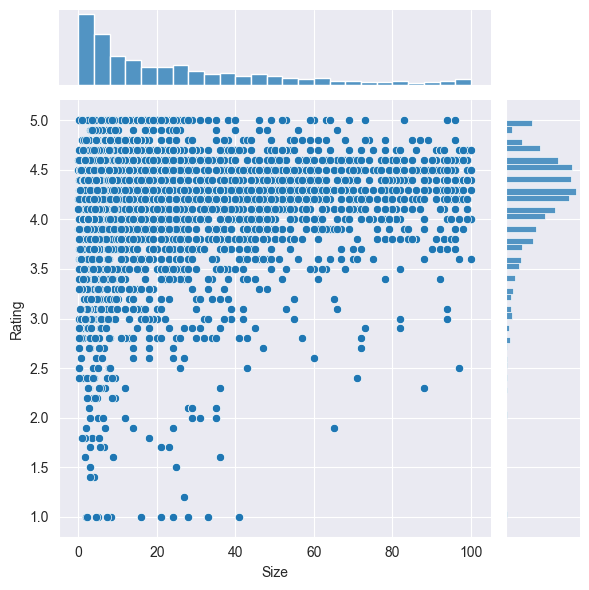

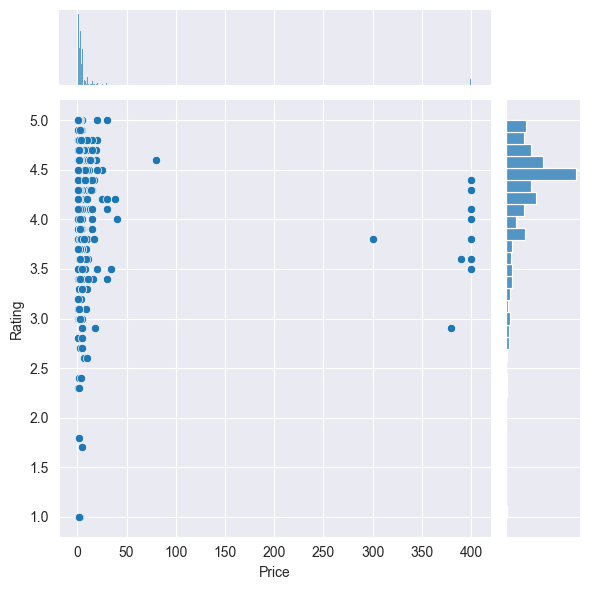

In [17]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps.dropna(subset=['Rating', 'Size'])

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby("Category").filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories["Size"], y = large_categories["Rating"])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

### Insights from the Analysis
- **App Size and Ratings**: The majority of top-rated apps (with ratings over 4) are between **2 MB and 20 MB**. This suggests that users generally prefer lightweight apps that offer quick downloads and minimal storage impact.
- **App Price Trends**: The vast majority of apps are priced under **$10**, indicating a preference for affordability. Free apps, in particular, dominate the market, underscoring the expectation for low-cost or no-cost mobile experiences.
  
### Implications
Understanding the balance between app size and functionality, along with pricing strategies, is critical for developers aiming to maximize user engagement and satisfaction. Developers should prioritize creating lightweight apps and carefully consider pricing strategies to meet user expectations and market demands.

## 8. Relation Between App Category and App Price

Monetizing an app effectively is one of the biggest challenges for developers. Choosing the right pricing strategy is critical to balancing profitability with user acquisition. Pricing decisions are influenced by factors such as the app’s features, complexity, platform, and most importantly, the willingness of users to pay. A poorly chosen price can deter potential users before they even download the app or lead to dissatisfaction post-purchase.

### Key Considerations for App Pricing
1. **Perceived Value**: Users are more likely to pay for apps that provide high value or serve a niche purpose, such as specialised medical apps.
2. **User Expectations**: Everyday utility apps (e.g., calculators) are typically expected to be free, while premium or highly specialised apps can command higher prices.
3. **Monetization Strategies**: Developers must weigh options like one-time purchases, subscription models, freemium versions, or ad-supported apps to maximize revenue without alienating users.



,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


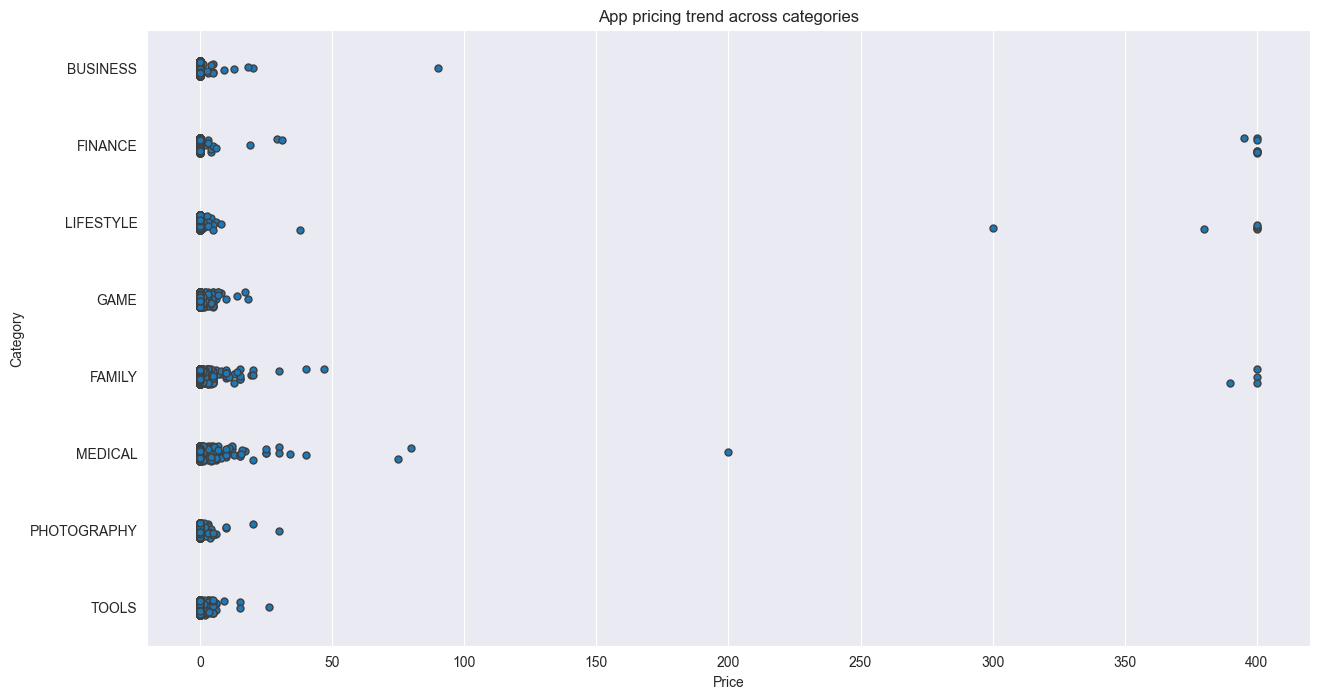

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps["Price"]>200]
apps_above_200[['Category', 'App', 'Price']]

### Insights from the Dataset
- **Medical Apps**: These are among the most expensive, with some prices reaching up to **$80**, reflecting the value of specialised, high-complexity applications.
- **Family Apps**: Also priced higher on average, suggesting that apps catering to education, parenting, or family engagement are perceived as valuable.
- **Game Apps**: Interestingly, all game apps are reasonably priced under **$20**, likely due to the high competition in this category and the widespread expectation for low-cost or freemium models.

### Implications
Different app categories justify different price ranges:
- **Utility and Daily Use Apps**: Best kept free or low-cost to meet user expectations.
- **Specialised Apps (e.g., Medical, Professional Tools)**: Can charge premium prices due to their niche appeal and specialised functionality.

Understanding the relationship between app category and pricing helps developers tailor their monetisation strategies to align with user expectations and market trends, ensuring both profitability and user satisfaction.

---

## 9. Filtering Out Junk Apps

In our analysis of app prices, we identified a subset of **junk apps**—extremely expensive apps with little to no real purpose. These apps, often created as jokes or as a means to exploit unsuspecting users, can skew the data and distort insights.

### Characteristics of Junk Apps
1. **Lack of Purpose**: Apps with names like *I Am Rich Premium* or *Most Expensive App (H)* typically serve no functional value.
2. **Excessive Pricing**: These apps are often priced outrageously high, far beyond what users would reasonably pay.
3. **Potential Malice**: Some developers may create these apps to trick users into accidental purchases, potentially with malicious intent.

### Why Filter Junk Apps?
Leaving these apps in the dataset can:
- **Skew Visualizations**: Artificially inflate the average price in certain categories.
- **Distort Insights**: Misrepresent the true pricing landscape of legitimate apps.
- **Reduce Data Integrity**: Compromise the quality and accuracy of the analysis.

### Approach
We will filter out apps that exhibit these characteristics by:
- Identifying apps with unusually high prices that serve no practical purpose.
- Removing these apps from the dataset to ensure more accurate visualisations and insights.

By eliminating these junk apps, we can refine our analysis to focus on legitimate apps, providing a clearer picture of market trends and more meaningful insights into app pricing strategies.


Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

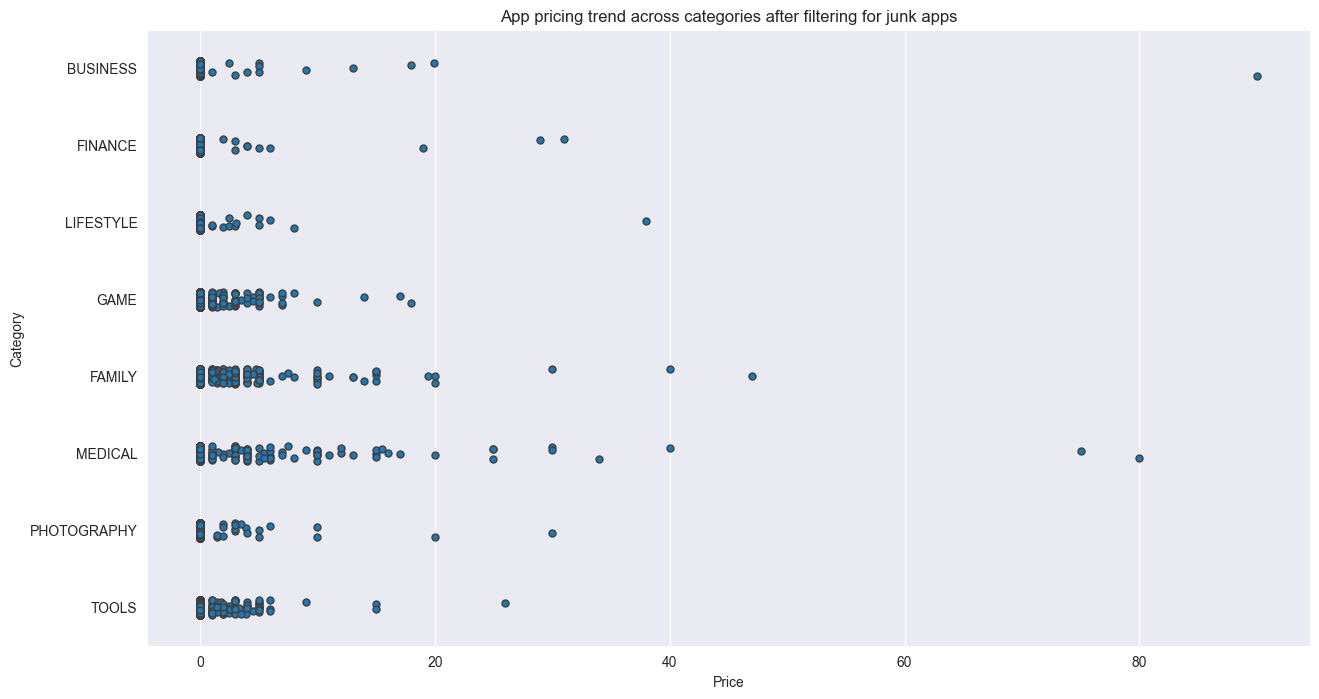

In [19]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

---

## 10. Popularity of Paid Apps vs. Free Apps

Pricing strategy plays a crucial role in the success of mobile apps. In the Play Store, there are five primary pricing models: free, freemium, paid, paymium, and subscription. For this analysis, we will focus on the two most common types—**free** and **paid** apps—to understand how their popularity compares in terms of user installs.

### Characteristics of Free Apps
- **Free to Download**: Users can install the app without any upfront cost.
- **Monetization through Ads**: Revenue is typically generated via in-app advertisements or data monetization.
- **Brand Extension**: Often created by companies as an extension of other products to enhance brand presence.
- **Customer Engagement**: Acts as a tool for customer retention, communication, and support.

### Characteristics of Paid Apps
- **One-Time Payment**: Users must pay upfront to download and access the app.
- **Limited Pre-Purchase Experience**: Users cannot try the app before buying, which may deter potential customers.



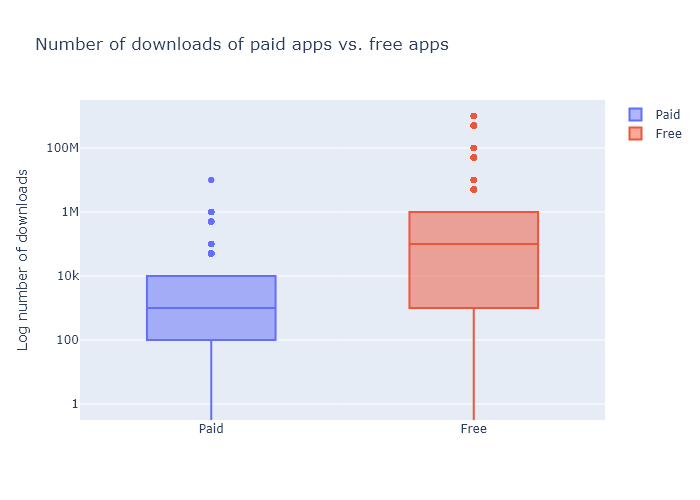

In [22]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]

fig = go.Figure({'data': data, 'layout': layout})
fig.write_html("images/app_popularity_box.html")  # Save as html
fig.show("png")

#plotly.offline.iplot({'data': data, 'layout': layout})



### Key Insight: Install Trends
Our analysis reveals that:
- **Free Apps Dominate in Install Volume**: As expected, free apps have a higher number of installs due to the low barrier to entry.
- **Paid Apps Have Lower, But Not Insignificant, Installs**: While paid apps are less frequently downloaded, the gap between free and paid installs is not as wide as anticipated, suggesting that users are still willing to pay for valuable or unique apps.

### Implications
1. **Free Apps**: Ideal for reaching a large user base quickly, making them suitable for ad-driven revenue models or as part of broader customer engagement strategies.
2. **Paid Apps**: Still viable for niche markets or high-value offerings, especially when the app provides unique or specialised functionality that users are willing to pay for.

Understanding the popularity dynamics between free and paid apps helps developers choose the most appropriate pricing strategy to balance user acquisition and revenue generation.

---

## 11. Sentiment Analysis of User Reviews

Understanding how users feel about an app is crucial for improving product quality and user satisfaction. **Sentiment analysis** is a technique used to mine user review data and classify the sentiment as **positive**, **negative**, or **neutral**. This helps developers gauge the general mood around their app and identify areas for improvement.

### How Sentiment Analysis Works
- **Positive Sentiment**: Indicated by words such as *amazing*, *friendly*, *good*, *great*, and *love*. These suggest user satisfaction and praise.
- **Negative Sentiment**: Indicated by words like *malware*, *hate*, *problem*, *refund*, and *incompetent*. These signal dissatisfaction or issues with the app.



Text(0.5, 1.0, 'Sentiment Polarity Distribution')

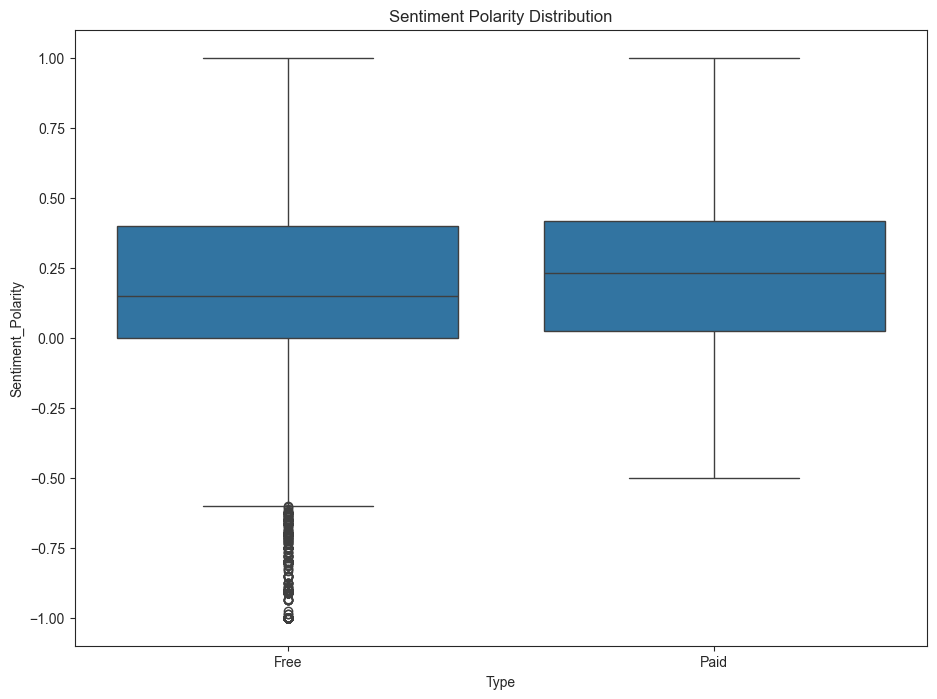

In [21]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join the two dataframes
merged_df = apps.merge(reviews_df)

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

### Key Findings from Sentiment Analysis
1. **Free Apps**: 
   - Receive a wide range of feedback, including many harsh comments, as shown by the outliers on the negative polarity axis.
   - The presence of more negative reviews may be due to lower user expectations, the presence of ads, or other monetisation strategies that could frustrate users.
   
2. **Paid Apps**:
   - Rarely receive extremely negative reviews, suggesting a generally higher level of user satisfaction.
   - The **median polarity score** for paid apps is slightly higher than for free apps, indicating a more consistently positive user experience.

### Implications
- **Quality Perception**: The findings suggest that paid apps may be perceived as higher quality than free apps, possibly due to more polished features, fewer ads, or better support.
- **User Expectations**: Users may have higher expectations for paid apps, but they are also less likely to leave extremely negative feedback if the app meets their expectations.
  

Sentiment analysis reveals important differences in user perceptions between free and paid apps. Developers of free apps should focus on minimizing frustrations (e.g., reducing intrusive ads), while paid app developers should continue to deliver high-quality experiences to justify their pricing and maintain positive sentiment.

---


## 12. Conclusion

In this notebook, we analysed data from over ten thousand apps on the Google Play Store to gain insights into app categories, pricing strategies, user ratings, and sentiment trends. Our findings provide valuable lessons for anyone considering entering the mobile app market. 

### Key Takeaways
1. **App Categories and Market Share**:  
   - **Family**, **Game**, and **Tools** apps dominate the market in terms of quantity.  
   - Specialised categories like **Medical** apps are fewer in number but can command higher prices.

2. **App Ratings**:  
   - The average app rating is **4.17**, with most apps being highly rated.  
   - The distribution of ratings is skewed toward the higher end, indicating user satisfaction across many categories.

3. **App Size and Price**:  
   - Top-rated apps are typically between **2 MB and 20 MB**, balancing functionality with ease of download.  
   - Most apps are priced under **$10**, with **Medical** and **Family** apps being the most expensive.

4. **Free vs. Paid Apps**:  
   - **Free apps** attract a larger user base but are more susceptible to negative reviews, often due to ads or other monetisation strategies.  
   - **Paid apps** tend to receive fewer but more positive reviews, indicating a perceived higher quality.

5. **Sentiment Analysis of Reviews**:  
   - Free apps often face more critical feedback, with outliers indicating harsh comments.  
   - Paid apps generally avoid extreme negativity, reinforcing the notion that users expect—and often receive—better quality for a paid product.

### Implications for Future App Development
- **Category Selection**: Choose a category that aligns with your expertise and market demand, considering niches like Medical or Business for premium pricing.  
- **Pricing Strategy**: Consider a freemium model for broader reach or a paid model for specialized, high-quality apps.  
- **User Experience**: Focus on delivering a lightweight, high-performance app to enhance user satisfaction and retention.  
- **Feedback Management**: Monitor and respond to user feedback to maintain positive sentiment and improve app quality over time.

By leveraging these insights, developers can make informed decisions to create successful, user-friendly apps that stand out in the competitive Google Play Store landscape.

---


## 13. Growth and Next Steps

Our analysis of the Google Play Store has provided valuable insights into app categories, pricing strategies, user sentiment, and performance metrics. However, this is just the beginning. To further enhance our understanding and stay competitive in the ever-evolving app market, the following steps can be taken:

### 1. **Deep Dive into Freemium and Subscription Models**  
   - Investigate how **freemium** and **subscription** models impact user retention and revenue growth.  
   - Analyze user engagement metrics like **session length**, **in-app purchases**, and **churn rates** to understand how these models affect long-term success.

### 2. **User Demographics and Regional Insights**  
   - Incorporate demographic data (age, location, device type) to identify trends and preferences across different user segments.  
   - Explore regional differences in app pricing, installs, and ratings to tailor strategies for global markets.

### 3. **Competitor Analysis**  
   - Compare top-performing apps within each category to identify key features and strategies driving their success.  
   - Study marketing tactics, user acquisition strategies, and update frequencies to benchmark against industry leaders.

### 4. **Sentiment Trends Over Time**  
   - Perform a time-series analysis of user reviews to track changes in sentiment and identify potential issues early.  
   - Investigate how app updates, new features, or pricing changes influence user sentiment.

### 5. **Predictive Modeling for Success**  
   - Develop predictive models to estimate an app's potential success based on features like size, price, category, and initial user ratings.  
   - Use machine learning techniques to predict user engagement and optimize pricing strategies.

### 6. **Continuous Feedback Loop**  
   - Establish a system for continuously collecting and analysing user feedback to make data-driven improvements.  
   - Regularly update the app based on user needs, market trends, and competitive analysis.

By taking these next steps, we can further refine our understanding of the mobile app market and enhance our ability to develop successful, user-centered apps. Continuous analysis, iteration, and adaptation will be key to sustaining growth and staying ahead in this competitive landscape.

---

## 14. Acknowledgement 

This project was conducted as part of the project portfolio for DataCamp's Data Scientist with Python Career Track. The analysis, insights, and visualisations presented here were made possible using the dataset provided by DataCamp. Special thanks to DataCamp for their comprehensive curriculum and resources that facilitated the development of data analysis and visualisation skills demonstrated in this project.